# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [76]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [77]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [78]:
#  1. Get the total rides for each city type
rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [79]:
# 2. Get the total drivers for each city type
drivers_per_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_per_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [80]:
#  3. Get the total amount of fares for each city type
total_fares_per_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_per_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [81]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_city_type =  total_fares_per_city_type / rides_by_city_type
avg_fare_per_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [82]:
# 5. Get the average fare per driver for each city type. 
avg_driverfare_per_city_type =  total_fares_per_city_type / drivers_per_city_type
avg_driverfare_per_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [83]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.DataFrame({
        "Total Rides By City Type" : rides_by_city_type ,
        "Total Drivers Per City Type": drivers_per_city_type ,
        "Total Fares Per City Type": total_fares_per_city_type ,
        "Average Fare per Ride": avg_fare_per_city_type ,
        "Average fare per Driver" : avg_driverfare_per_city_type 
        })

PyBer_summary_df

,Total Rides By City Type,Total Drivers Per City Type,Total Fares Per City Type,Average Fare per Ride,Average fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [84]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None

In [86]:
#  8. Format the columns.

PyBer_summary_df["Total Rides By City Type"] = PyBer_summary_df["Total Rides By City Type"].map("{:.0f}".format)

PyBer_summary_df["Total Drivers Per City Type"] = PyBer_summary_df["Total Drivers Per City Type"].map("{:.0f}".format)

PyBer_summary_df["Total Fares Per City Type"] = PyBer_summary_df["Total Fares Per City Type"].map('${:,.2f}'.format)

PyBer_summary_df["Average Fare per Ride"] = PyBer_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

PyBer_summary_df["Average fare per Driver"] = PyBer_summary_df["Average fare per Driver"].map('${:,.2f}'.format)

PyBer_summary_df

,Total Rides By City Type,Total Drivers Per City Type,Total Fares Per City Type,Average Fare per Ride,Average fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [174]:
# 1. Read the merged DataFrame
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
city_type_profit = pyber_data_df.groupby(["type","date"]).sum()["fare"]
city_type_profit

type   date         
Rural  1/1/19 9:45      43.69
       1/11/19 4:39     16.42
       1/14/19 15:58    54.10
       1/14/19 7:09     18.05
       1/15/19 21:44    30.26
                        ...  
Urban  5/8/19 1:54      32.69
       5/8/19 2:31      41.33
       5/8/19 4:20      21.99
       5/8/19 4:39      18.45
       5/8/19 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [175]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
city_type_profit = city_type_profit.reset_index()
city_type_profit

,type,date,fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26
...,...,...,...
2359,Urban,5/8/19 1:54,32.69
2360,Urban,5/8/19 2:31,41.33
2361,Urban,5/8/19 4:20,21.99
2362,Urban,5/8/19 4:39,18.45


In [176]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_type_profit_pivot = city_type_profit.pivot(index = "date",columns = "type", values = "fare")
city_type_profit_pivot

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [212]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df = city_type_profit_pivot
df.loc['2019-01-01' : '2019-04-29'] 
df

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [213]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
df.index = pd.to_datetime(df.index)

In [214]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [215]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample('W').sum()
df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


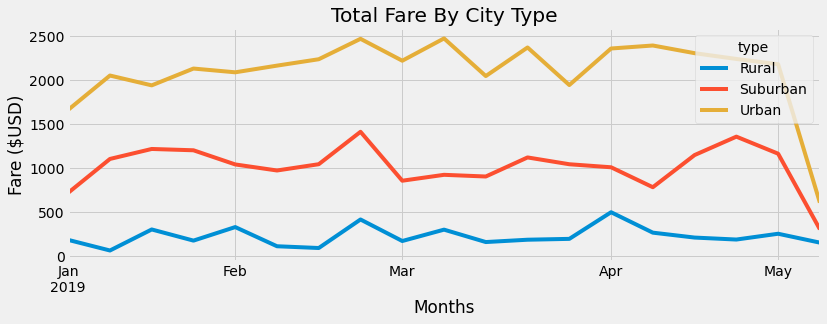

In [219]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
df.plot(figsize = (12,4))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig("PyBer_fare_summary.png",dpi= 300, bbox_inches='tight')